<a href="https://colab.research.google.com/github/ladekar/AI-ML-DL/blob/master/neutal-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

In [50]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2


if __name__ == "__main__":
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y)

    for i in range(1500):
        nn.feedforward()
        nn.backprop()

    print(nn.output)


[[0.02397422]
 [0.97439421]
 [0.98389505]
 [0.02174416]]


In [51]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # seeding for random number generation
        np.random.seed(1)
        
        #converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via  the neuron
            output = self.think(training_inputs)

            #computing error rate for back-propagation
            error = training_outputs - output
            
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        #passing the inputs via the neuron to get output   
        #converting values to floats
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    #initializing the neuron class
    neural_network = NeuralNetwork()

    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)

    #training data consisting of 4 examples--3 input values and 1 output
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    #training taking place
    neural_network.train(training_inputs, training_outputs, 15000)

    print("Ending Weights After Training: ")
    print(neural_network.synaptic_weights)

    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(neural_network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Wow, we did it!")

Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Ending Weights After Training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
User Input One: 12
User Input Two: 34
User Input Three: 56
Considering New Situation:  12 34 56
New Output data: 
[7.28973359e-69]
Wow, we did it!


## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [5]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

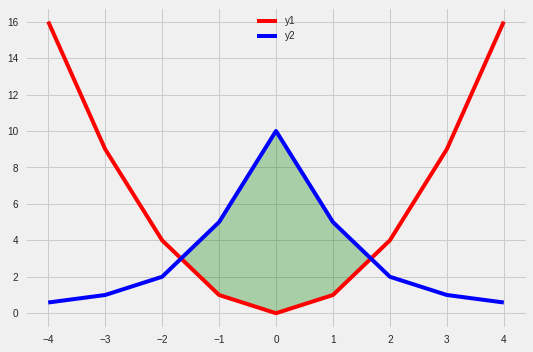

In [34]:
plt.ioff()
plt.style.use('fivethirtyeight')
x = np.arange(-4, 5)
y1 = x ** 2
y2 = 10 / (x ** 2 + 1)
fig, ax = plt.subplots()
ax.plot(x, y1, 'rx', x, y2, 'b+', linestyle='solid')
ax.fill_between(x, y1, y2, where=y2>y1, interpolate=True,
color='green', alpha=0.3)
lgnd = ax.legend(['y1', 'y2'], loc='upper center', shadow=True)
lgnd.get_frame().set_facecolor('#ffb19a')
plt.show()

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

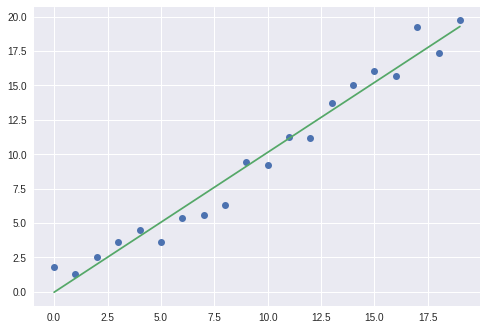

In [1]:
import matplotlib.pyplot as plt

import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

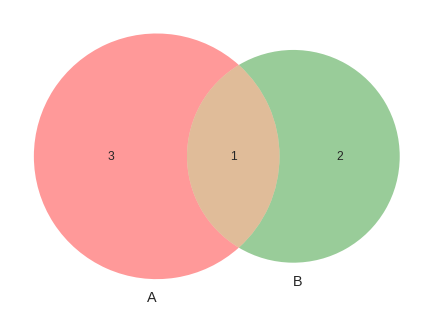

In [3]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).